In [330]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import statsmodels.api as sm

In [23]:
economic_df = pd.read_csv('Data/acs_5yr_est_selected_economic_characteristics_2010-2022.csv')

In [24]:
economic_df.head()

,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
0,EMPLOYMENT STATUS,Header,Alabama,NaN,NaN,NaN,NaN,2010
1,Population 16 years and over,EMPLOYMENT STATUS,Alabama,"3,714,504","±1,588","3,714,504",(X),2010
2,In labor force,EMPLOYMENT STATUS,Alabama,"2,246,848","±5,576",60.5%,±0.1,2010
3,Civilian labor force,EMPLOYMENT STATUS,Alabama,"2,230,879","±5,531",60.1%,±0.1,2010
4,Employed,EMPLOYMENT STATUS,Alabama,"2,036,867","±5,904",54.8%,±0.2,2010


In [26]:
economic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98020 entries, 0 to 98019
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Label (Grouping)         98020 non-null  object
 1   Category                 98020 non-null  object
 2   State                    98020 non-null  object
 3   Estimate                 92612 non-null  object
 4   Margin of Error          92612 non-null  object
 5   Percent                  92612 non-null  object
 6   Percent Margin of Error  92612 non-null  object
 7   Year                     98020 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 6.0+ MB


In [27]:
economic_df['Estimate'] = economic_df['Estimate'].replace('(X)','0')
economic_df['Estimate'] = economic_df['Estimate'].str.replace(',', '').astype(float)

economic_df['Percent'] = economic_df['Percent'].replace('(X)','0')
economic_df['Percent'] = economic_df['Percent'].str.replace(',', '').str.replace('%','').astype(float)

economic_df['Margin of Error'] = economic_df['Margin of Error'].replace('(X)','0')
economic_df['Margin of Error'] = economic_df['Margin of Error'].str.replace(',', '').str.replace('±','').astype(float)

economic_df['Percent Margin of Error'] = economic_df['Percent Margin of Error'].replace('(X)','0')
economic_df['Percent Margin of Error'] = economic_df['Percent Margin of Error'].str.replace(',', '').str.replace('±','').astype(float)

In [28]:
economic_df['Category'].unique()

array(['Header', 'EMPLOYMENT STATUS', 'COMMUTING TO WORK', 'OCCUPATION',
       'INDUSTRY', 'CLASS OF WORKER',
       'INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS)',
       'HEALTH INSURANCE COVERAGE',
       'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL',
       'INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2013 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2014 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)',
       'IN

In [29]:
# clean the labels for better formatting (eg. trail white space, :,...)
def clean_labels(x):
    x = x.strip()
    x = x.replace(':', '')
    return x

economic_df['Label (Grouping)'] = economic_df['Label (Grouping)'].apply(clean_labels)

## Handling NA values

In [30]:
economic_df.isna().sum()

Label (Grouping)              0
Category                      0
State                         0
Estimate                   5408
Margin of Error            5408
Percent                    5408
Percent Margin of Error    5408
Year                          0
dtype: int64

In [31]:
economic_df[economic_df['Category']=='Header'].count()

Label (Grouping)           5408
Category                   5408
State                      5408
Estimate                      0
Margin of Error               0
Percent                       0
Percent Margin of Error       0
Year                       5408
dtype: int64

In [32]:
economic_df.dropna(inplace=True)

In [39]:
nan_economic_stat_df = pd.DataFrame(economic_df.groupby(['Category']).apply(lambda x: [(x['Estimate']==0).sum(), 
                                                   (x['Margin of Error']==0).sum(), 
                                                   (x['Percent']==0).sum(),
                                                   (x['Percent Margin of Error']==0).sum()]))

In [43]:
nan_economic_stat_df = nan_economic_stat_df[0].apply(pd.Series)
nan_economic_stat_df.rename(columns={0:'Estimate', 1:'Margin of Error', 2:'Percent', 3:'Percent Margin of Error'})

,Estimate,Margin of Error,Percent,Percent Margin of Error
Category,,,,
CLASS OF WORKER,0,0,0,676
COMMUTING TO WORK,0,0,676,1352
EMPLOYMENT STATUS,676,676,15,3380
HEALTH INSURANCE COVERAGE,2496,2496,2496,6500
INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS),0,0,780,936
INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS),0,0,780,936
INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS),0,0,780,936
INCOME AND BENEFITS (IN 2013 INFLATION-ADJUSTED DOLLARS),0,0,780,936
INCOME AND BENEFITS (IN 2014 INFLATION-ADJUSTED DOLLARS),0,0,780,936


We will handle them individually

## Health Insurance Coverage

In [13]:
economic_df[economic_df['Category']=='HEALTH INSURANCE COVERAGE'][economic_df['Estimate']==0].Year.unique()

/var/folders/fm/rwn89n9x1b94vk3rbr72zvtw0000gn/T/ipykernel_73237/541514935.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  economic_df[economic_df['Category']=='HEALTH INSURANCE COVERAGE'][economic_df['Estimate']==0].Year.unique()


array([2010, 2011])

In [14]:
economic_df[economic_df['Category']=='HEALTH INSURANCE COVERAGE'][economic_df['Estimate']==0].index

/var/folders/fm/rwn89n9x1b94vk3rbr72zvtw0000gn/T/ipykernel_73237/2564151707.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  economic_df[economic_df['Category']=='HEALTH INSURANCE COVERAGE'][economic_df['Estimate']==0].index


Index([  101,   102,   103,   104,   105,   106,   107,   108,   109,   110,
       ...
       15050, 15051, 15052, 15053, 15054, 15055, 15056, 15057, 15058, 15059],
      dtype='int64', length=2496)

In [15]:
# Drop 2010, 2011 data of health insurance
economic_df.drop(economic_df[economic_df['Category']=='HEALTH INSURANCE COVERAGE'][economic_df['Estimate']==0].index,inplace=True)

/var/folders/fm/rwn89n9x1b94vk3rbr72zvtw0000gn/T/ipykernel_73237/1321423697.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  economic_df.drop(economic_df[economic_df['Category']=='HEALTH INSURANCE COVERAGE'][economic_df['Estimate']==0].index,inplace=True)


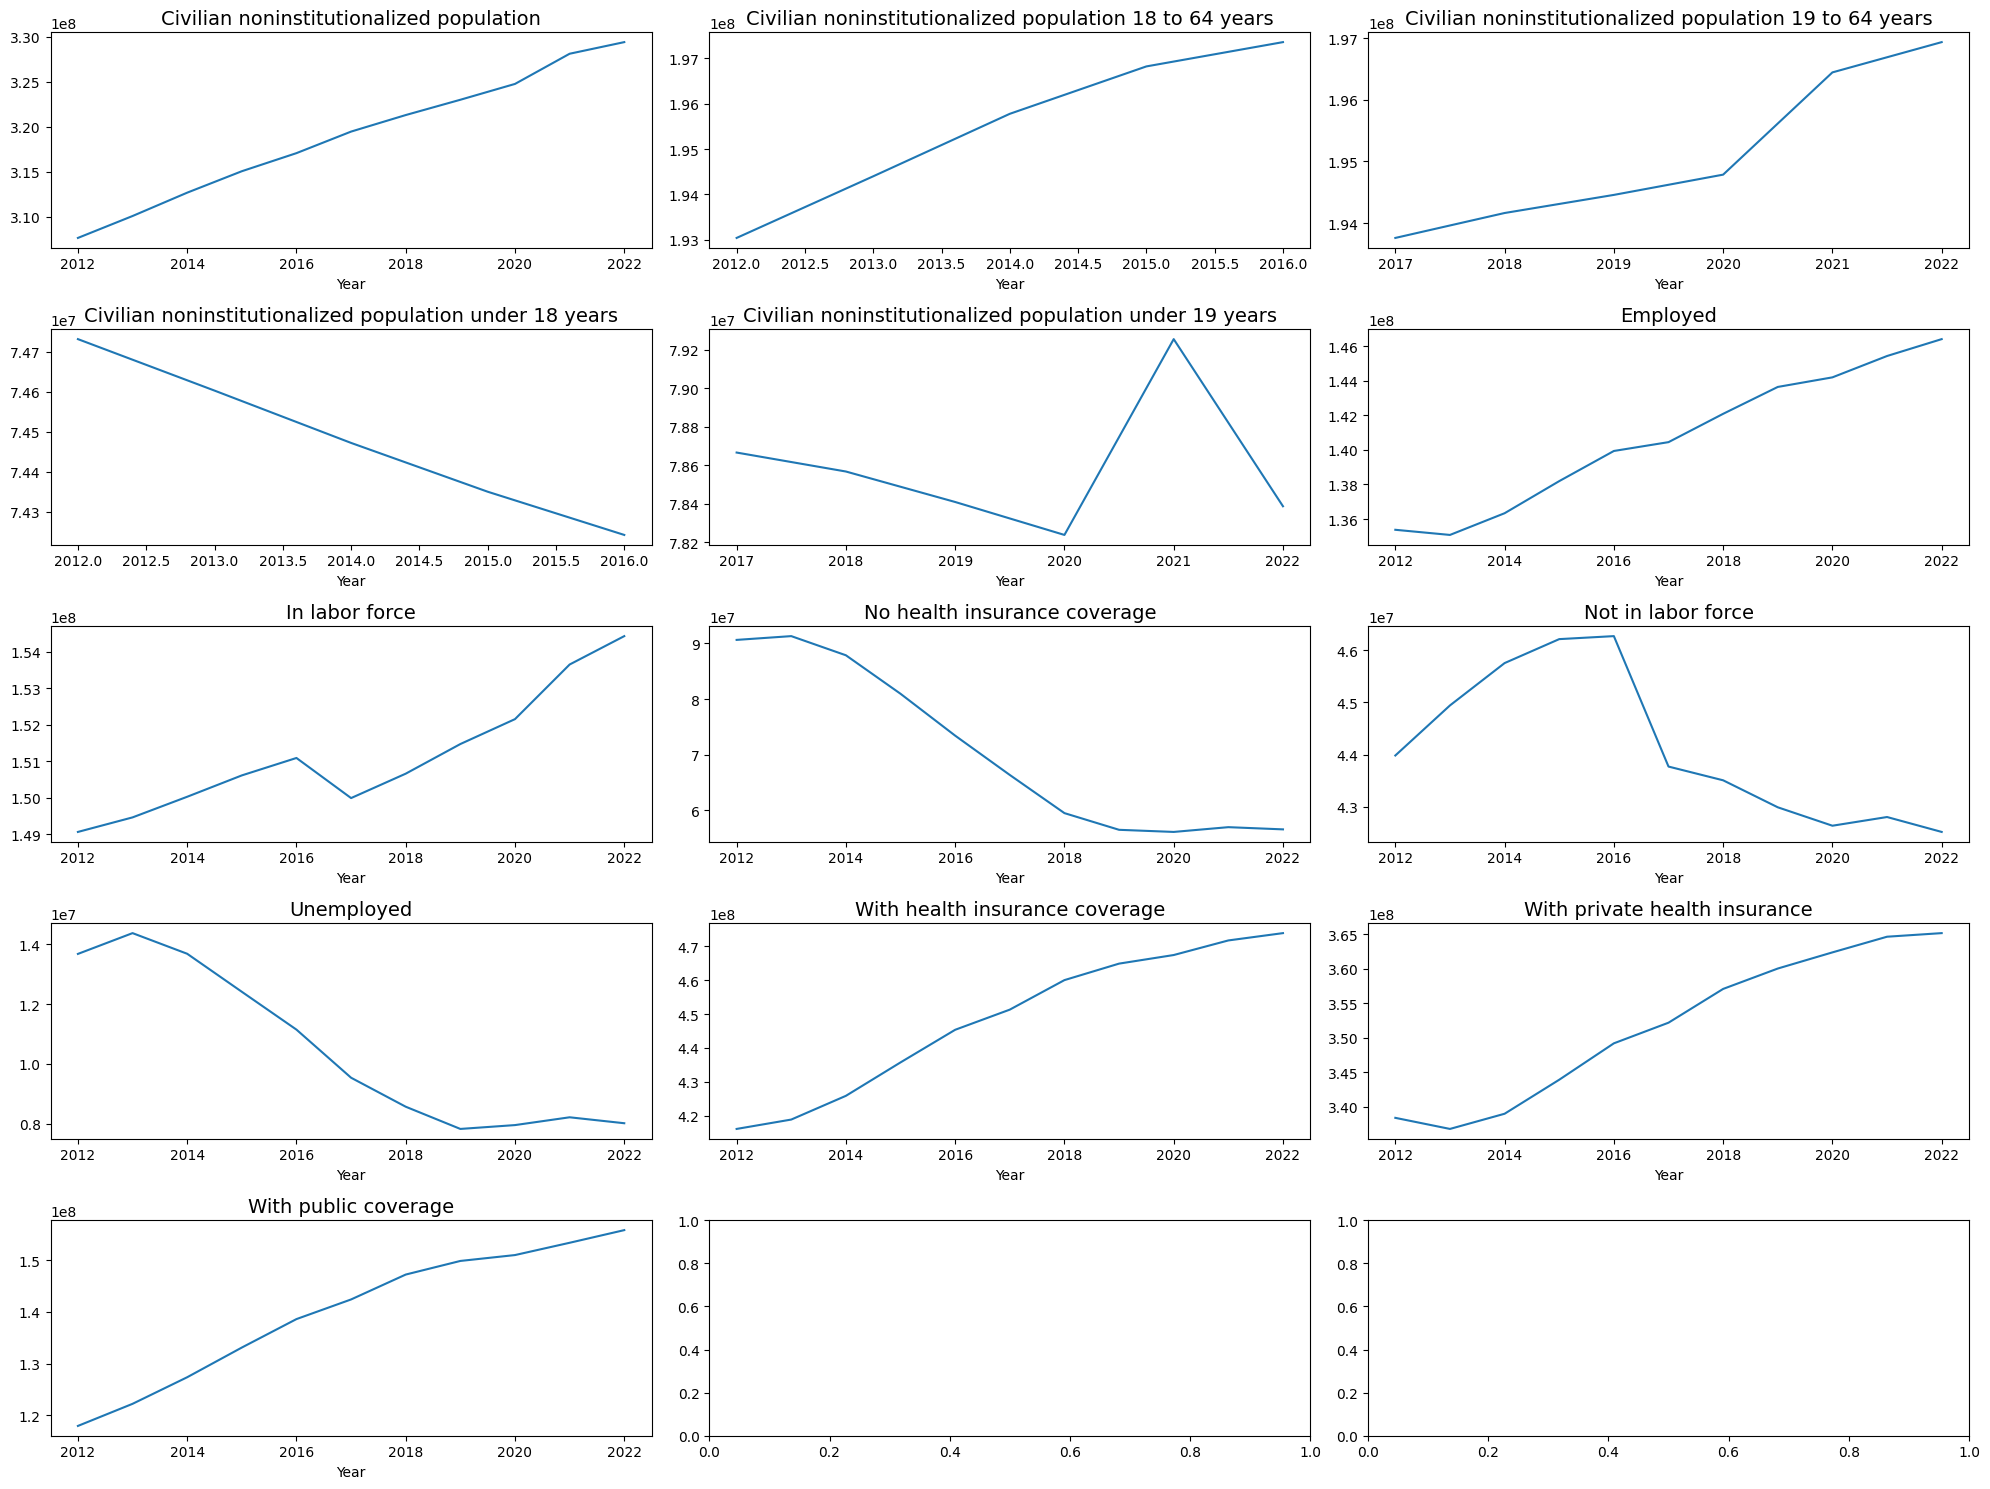

In [16]:
# Plot lineplot for each label group (aggregated by all states)

US_HIC_group = economic_df[economic_df['Category']=='HEALTH INSURANCE COVERAGE'].groupby(['Label (Grouping)','Year'])
US_HIC_df = US_HIC_group['Estimate'].sum()

num_cols = 3
num_rows = len(US_HIC_df.index.get_level_values(0).unique()) // num_cols + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 3*num_rows))

for i, label in enumerate(US_HIC_df.index.get_level_values(0).unique()):
    ax = axes[i // num_cols, i % num_cols]
    US_HIC_df.loc[label,:].plot(ax=ax)

    ax.set_title(label, fontsize=14)
    plt.tight_layout()


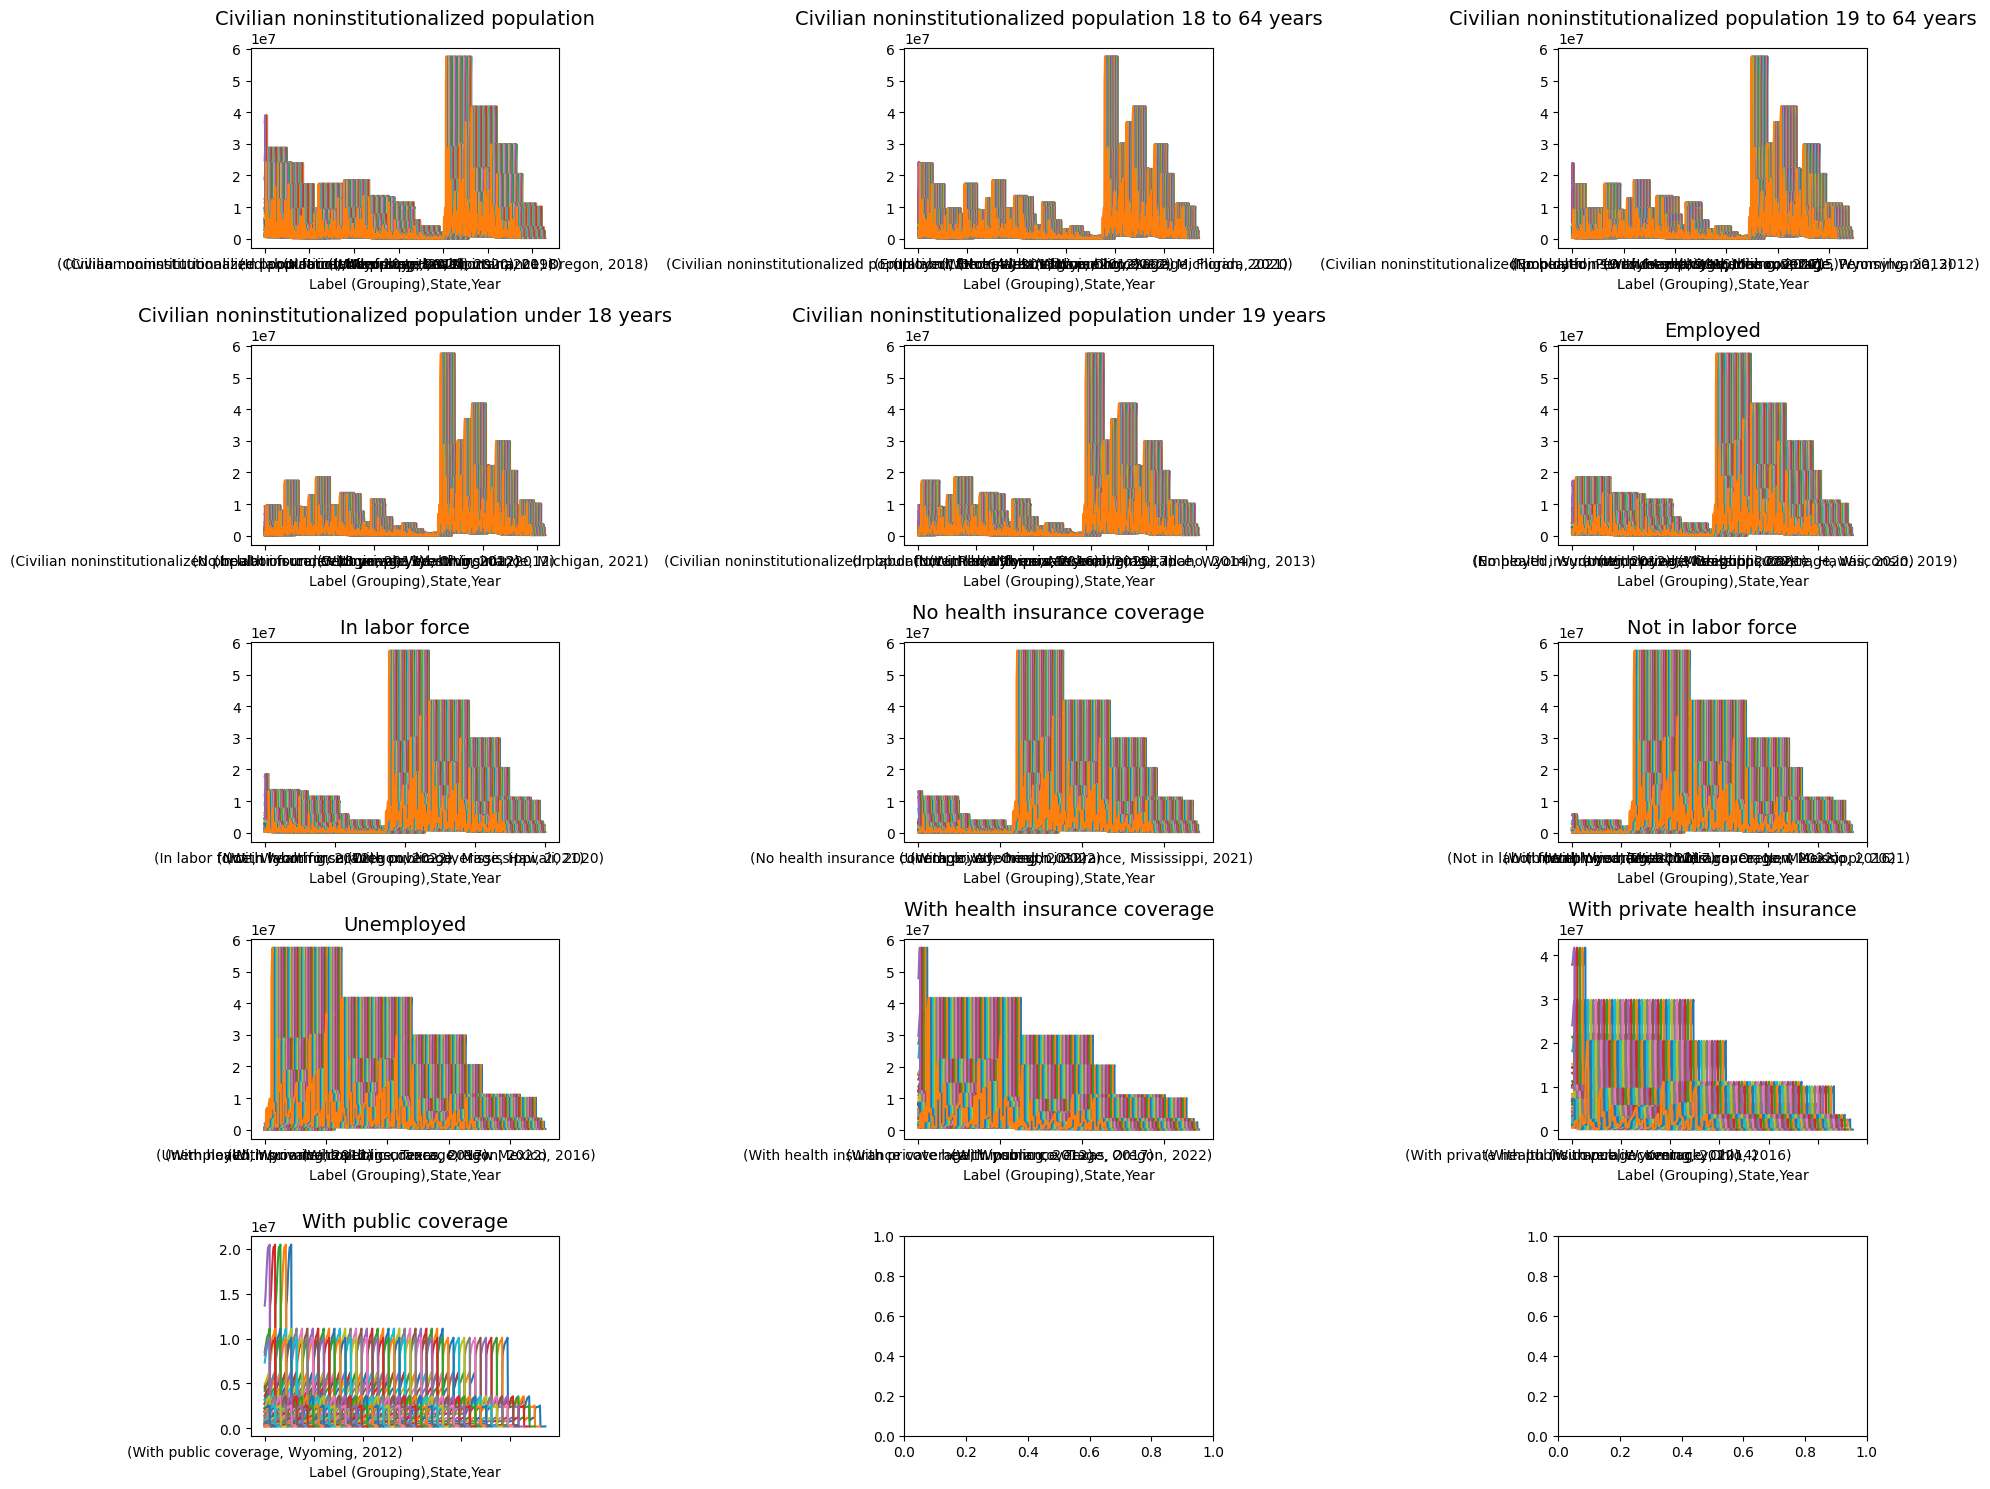

In [17]:
# Plot lineplot for each label group (aggregated by all states)

US_states_HIC_group = economic_df[economic_df['Category']=='HEALTH INSURANCE COVERAGE'].groupby(['Label (Grouping)','State', 'Year'])
US_states_HIC_df = US_states_HIC_group['Estimate'].sum()

num_cols = 3
num_rows = len(US_HIC_df.index.get_level_values(0).unique()) // num_cols + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 3*num_rows))

for i, label in enumerate(US_states_HIC_df.index.get_level_values(0).unique()):
    ax = axes[i // num_cols, i % num_cols]
    for state in US_states_HIC_df.index.get_level_values(1).unique():
        US_states_HIC_df.loc[(label,state):].plot(ax=ax)

    ax.set_title(label, fontsize=14)
    plt.tight_layout()

## Employment Status

In [62]:
employment_df = economic_df[economic_df['Category']=='EMPLOYMENT STATUS']

In [80]:
list(employment_df['Label (Grouping)'].unique())

['Population 16 years and over',
 'In labor force',
 'Civilian labor force',
 'Employed',
 'Unemployed',
 'Armed Forces',
 'Not in labor force',
 'Percent Unemployed',
 'Females 16 years and over',
 'Own children under 6 years',
 'All parents in family in labor force',
 'Own children 6 to 17 years',
 'Unemployment Rate',
 'Own children of the householder under 6 years',
 'Own children of the householder 6 to 17 years']

In [73]:
# effectively there is no nan value for estimate (since the two grouping are percentages)
employment_df[(employment_df['Estimate']==0)]['Label (Grouping)'].unique()

array(['Percent Unemployed', 'Unemployment Rate'], dtype=object)

In [74]:
# only armed force got no percent data
employment_df[(employment_df['Percent']==0)]['Label (Grouping)'].unique()

array(['Armed Forces'], dtype=object)

### Data Transformations

In [217]:
# Percent Unemployed is effectively the unemployment rate for 2010-2014

employment_df.loc[employment_df['Label (Grouping)'] == 'Percent Unemployed','Label (Grouping)'] = 'Unemployment Rate'

# group them by label, state, year
employment_grouped_df = employment_df.groupby(['Label (Grouping)','State','Year']) \
                        [['Estimate','Percent','Margin of Error','Percent Margin of Error']].mean()

In [212]:
# average unemployment rate across the state 
average_unemployment_rate = employment_grouped_df.unstack(1).loc['Unemployment Rate','Percent'].mean(axis=1)

In [345]:
all_states = employment_df.State.unique()

In [213]:
# https://wisevoter.com/state-rankings/beef-production-by-state/
top3_beef_producer = ['Texas','Oklahoma','Missouri']

In [214]:
# unemployed / civilian labor force to get estimated unemployed rate
# unemployment_rate_state_df = (employment_grouped_df.loc[('Unemployed',),:]['Estimate']/ \
#                                 employment_grouped_df.loc[('Civilian labor force',),:]['Estimate'])*100
# 
# average_unemployment_rate = unemployment_rate_state_df.unstack(0).mean(axis=1)

[]

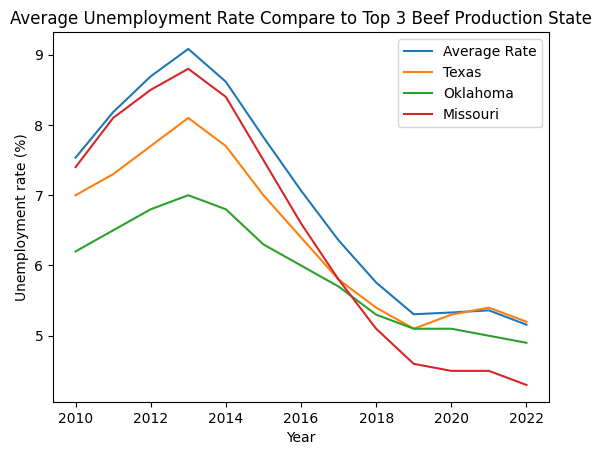

In [216]:
average_unemployment_rate.plot(label='Average Rate')
for state in top3_beef_producer:
    employment_grouped_df.loc[('Unemployment Rate',state),'Percent'].plot(label=state)
    plt.legend()

plt.title('Average Unemployment Rate Compare to Top 3 Beef Production State')
plt.xlabel('Year')
plt.ylabel('Unemployment rate (%)')
plt.plot()

In [243]:
# https://www.indexbox.io/search/top-10-pork-producing-states/
top3_pork_producer = ['Iowa', 'North Carolina', 'Minnesota']

[]

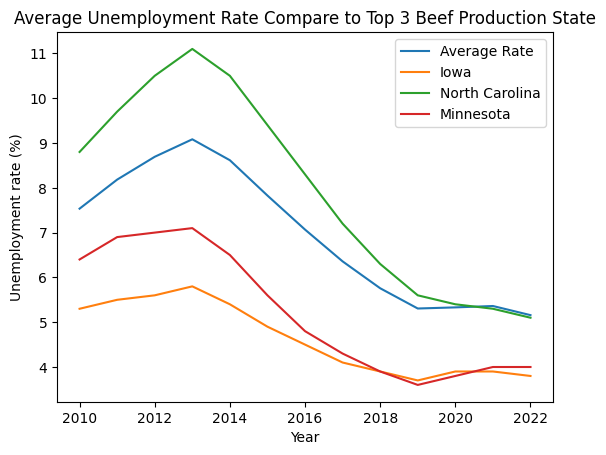

In [244]:
average_unemployment_rate.plot(label='Average Rate')
for state in top3_pork_producer:
    employment_grouped_df.loc[('Unemployment Rate',state),'Percent'].plot(label=state)
    plt.legend()

plt.title('Average Unemployment Rate Compare to Top 3 Beef Production State')
plt.xlabel('Year')
plt.ylabel('Unemployment rate (%)')
plt.plot()

In [248]:
top3_chicken_producer = ['Georgia', 'Alabama', 'Arkansas']

[]

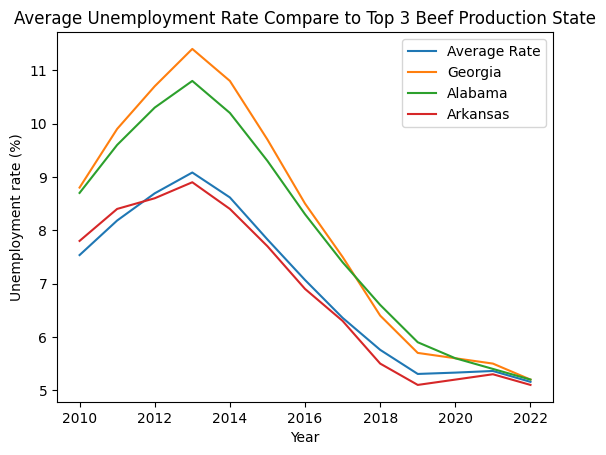

In [249]:
average_unemployment_rate.plot(label='Average Rate')
for state in top3_chicken_producer:
    employment_grouped_df.loc[('Unemployment Rate',state),'Percent'].plot(label=state)
    plt.legend()

plt.title('Average Unemployment Rate Compare to Top 3 Beef Production State')
plt.xlabel('Year')
plt.ylabel('Unemployment rate (%)')
plt.plot()

### Are there any relationships between meat production and unemployment rate (especially in shortlisted states)

In [335]:
meat_production_df = pd.read_csv("Data/Meat_Stats_Meat_Production.csv", index_col=0)
meat_cold_storage_df = pd.read_csv('Data/Meat_Stats_Cold_Storage.csv')
meat_slaughter_counts_df = pd.read_csv('Data/Meat_Stats_Slaughter_Counts.csv')
meat_slaughter_weights_df = pd.read_csv('Data/Meat_Stats_Slaughter_Weights.csv')

In [336]:
meat_production_df.Animal.unique()

array(['Beef', 'Veal', 'Pork', 'Lamb and Mutton', 'Broilers',
       'Other Chicken', 'Turkey'], dtype=object)

In [337]:
# simpify the grouping

simplied_animal_dict = {
    'Other Chicken': 'Broilers',
    'Turkey': 'Others',
    'Veal': 'Others',
    'Lamb and Mutton': 'Others',
    'Beef': 'Beef',
    'Pork': 'Pork',
    'Broilers': 'Broilers'
}

meat_production_df['Animal'] = meat_production_df['Animal'].map(simplied_animal_dict)

In [338]:
# filtering irrelavent data
meat_production_df = meat_production_df[(meat_production_df['Year']>=2010) & (meat_production_df['Year']<=2022)]

# simple transformation
meat_production_df['Production'] = meat_production_df['Production'].str.replace(',','').apply(float)

In [339]:
grouped_animal_df = meat_production_df.groupby(['Animal','Year'])['Production'].sum()

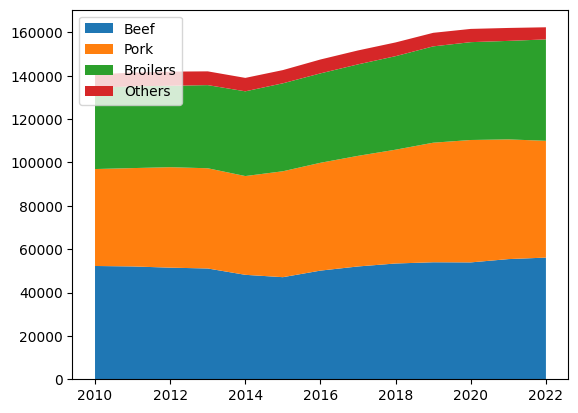

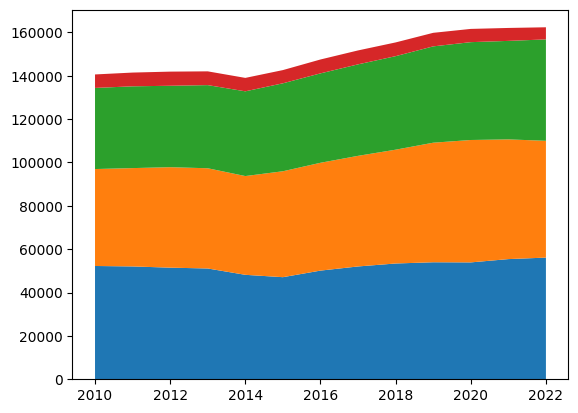

In [340]:
category = ['Beef','Pork','Broilers','Others']

Beef_production = grouped_animal_df.loc['Beef',:].values
Pork_production = grouped_animal_df.loc['Pork',:].values
Broilers_production = grouped_animal_df.loc['Broilers',:].values
Others_production = grouped_animal_df.loc['Others',:].values

x = np.sort(meat_production_df.Year.unique())
y = np.vstack([Beef_production, Pork_production, Broilers_production, Others_production])

fig, ax = plt.subplots()

ax.stackplot(np.sort(meat_production_df.Year.unique()),
             Beef_production,
             Pork_production,
             Broilers_production,
             Others_production,
             labels=category,
             )
ax.legend(loc='upper left')

fig, ax = plt.subplots()
ax.stackplot(x, y)


### OLS Regression

In [428]:
total_meat_production_series


Year
2010    140605.2
2011    141469.0
2012    141905.2
2013    142030.9
2014    139012.9
2015    142613.4
2016    147505.0
2017    151683.6
2018    155373.6
2019    159802.3
2020    161609.5
2021    162050.9
2022    162360.8
dtype: float64

In [393]:
# run OLS Regression on all states to see if there are any linear relationship between
# meat production and unemployment rate


total_meat_production_series = grouped_animal_df.unstack(0).sum(axis=1)

results_list = []
rsquare = np.zeros((len(all_states),))
pvalues = np.zeros((len(all_states),))
beta = np.zeros((len(all_states),))
beta_95CI = np.zeros((2, len(all_states)))

# run the OLS regression and store the results
for n, state in enumerate(all_states):
    model = sm.OLS(employment_grouped_df.loc[('Unemployment Rate',state),'Percent'].values, sm.add_constant(total_meat_production_series.values))
    results = model.fit()
    results_list.append(results)
    rsquare[n] = results.rsquared
    beta[n] = results.params[1]
    beta_95CI[:,n] = results.conf_int(alpha=0.05)[1,:]
    pvalues[n] = results.pvalues[1]

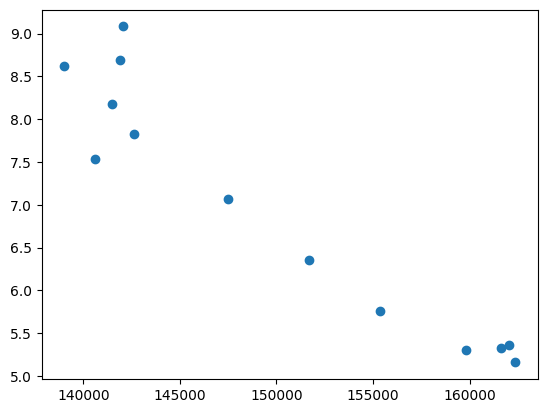

In [419]:
plt.scatter(total_meat_production_series,average_unemployment_rate.values)

Text(0, 0.5, 'Rsquare')

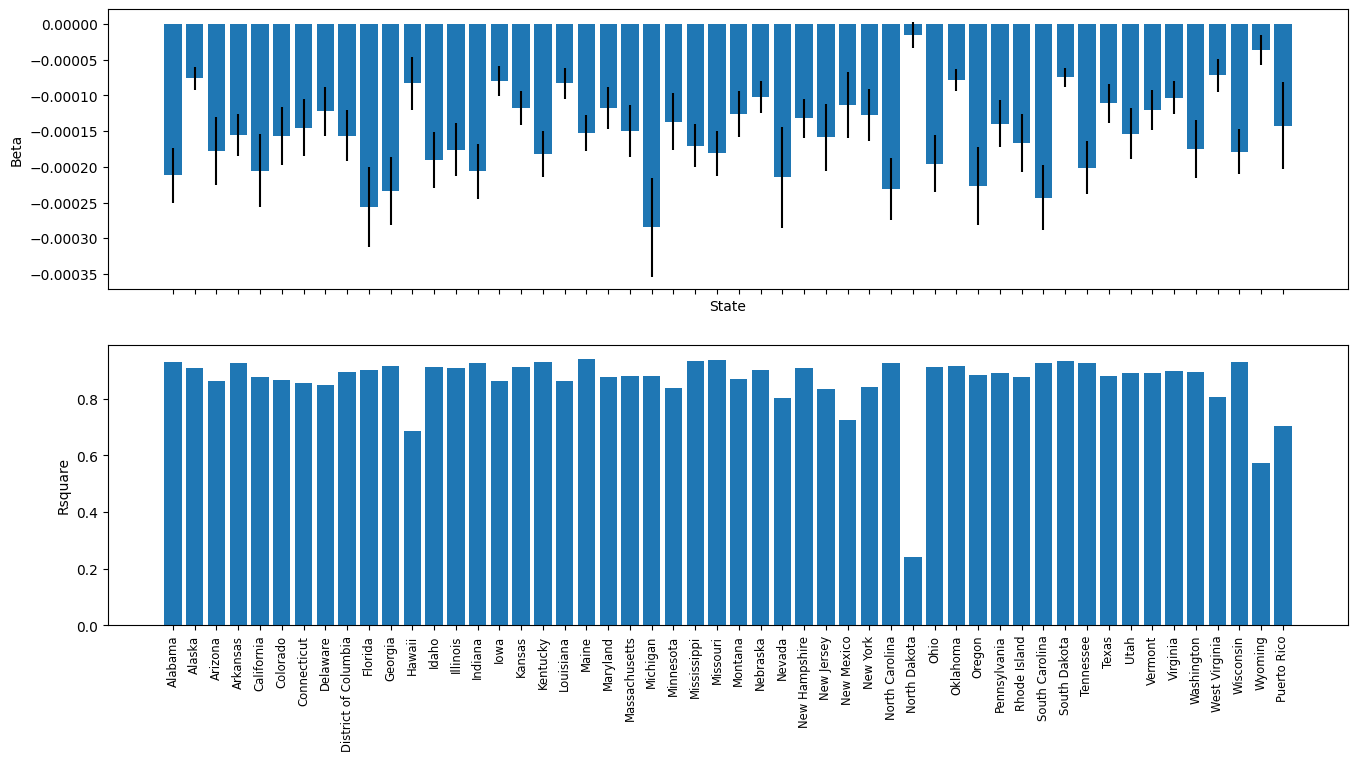

In [426]:
fig, axes = plt.subplots(2, 1, figsize=(16,8), sharex=True)

axes[0].bar(np.arange(1,len(all_states)+1,1), beta, yerr=(beta-beta_95CI)[0,:])
axes[0].set_xticks(range(len(all_states)),all_states, rotation=90, fontsize='small')
axes[0].set_xlabel('State')
#axes[0,1].set_xlabel('Test Assets')
axes[0].set_ylabel('Beta')


axes[1].bar(np.arange(1,len(all_states)+1,1), rsquare)
axes[1].set_xticks(np.arange(1,len(all_states)+1,1))
axes[1].set_xticklabels(all_states, rotation=90, fontsize='small')
#axes[1].set_xlabel('Test Assets')
axes[1].set_ylabel('Rsquare')

# plt.subplots_adjust(wspace=0.2, hspace=0.0)

In [323]:
meat_slaughter_weights_df.Animal.unique()

array(['Cattle', 'Calves', 'Hogs', 'Sheep and Lambs', 'Broilers',
       'Other Chickens', 'Turkeys', 'Steers', 'Heifers', 'Cows',
       'Bulls and Stags'], dtype=object)

In [321]:
meat_slaughter_counts_df.Animal.unique()

array(['Cattle', 'Steers', 'Heifers', 'Beef Cows', 'Dairy Cows',
       'Bulls and Stags', 'Calves', 'Hogs', 'Barrows and Gilts', 'Sows',
       'Boars and Stags', 'Sheep and Lambs', 'Lambs and Yearlings',
       'Mature Sheep', 'Broilers', 'Other chickens', 'Turkeys'],
      dtype=object)

In [317]:
meat_cold_storage_df.Animal.unique()

array(['Beef', 'Veal', 'Pork', 'Lamb and Mutton', 'Broiler',
       'Other Chicken', 'Turkey', 'Frozen Eggs'], dtype=object)